# EARLY PREDICTION OF DIABETES RISK

## Problem Statement:
Diabetes is a major global health concern that affects millions of people every year. Early detection can help individuals take preventive steps and manage their health better. In this project, we use real-world health data from patients to build a machine learning model that can predict whether a person is likely to have diabetes or not. Students will explore the data, clean and prepare it, apply SMOTE to handle imbalance, and build a K-Nearest Neighbors (KNN) classifier to make predictions. The goal is to not only improve technical skills but also understand how data science can support important health decisions.

## Learning Objectives:
Explore and clean real-world health datasets to prepare for analysis

Identify and treat data quality issues such as missing or irrelevant values

Apply feature scaling techniques to prepare data for machine learning

Implement oversampling using SMOTE to address class imbalance

Build and train a K-Nearest Neighbors (KNN) classifier

Evaluate model performance using accuracy, precision, recall, and F1 score

Visualize insights using plots like histograms, pair plots, and heatmaps

Interpret results to derive meaningful conclusions about diabetes risk factors

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
df= pd.read_csv('C:/Users/HP/Downloads/diabetes-data.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

The summary statistics reveal important insights. For instance, some columns like 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' have minimum values of 0, which are biologically impossible for these measurements. This indicates that these zeros are likely placeholders for missing values and will need to be addressed.

In [ ]:
df_copy = df.copy(deep=True)

A new DataFrame df_copy is created, which is an independent copy of df. All subsequent data cleaning and preprocessing steps will be performed on df_copy.

In [ ]:
df_copy

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [ ]:
print(df_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


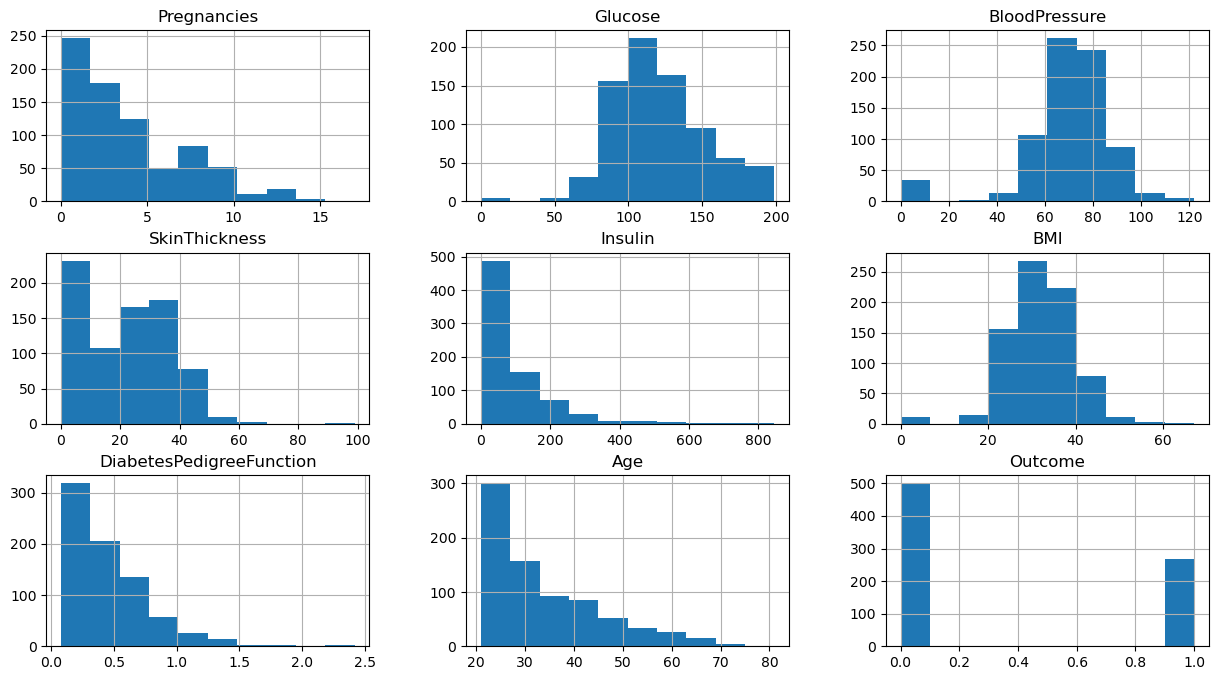

In [ ]:
hist = df_copy.hist(figsize=(15,8))

The histograms clearly show peaks at zero for 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI', visually confirming that these columns contain a significant number of zero values, which are likely invalid measurements. Other distributions, like 'Pregnancies' and 'Age', appear more typical.

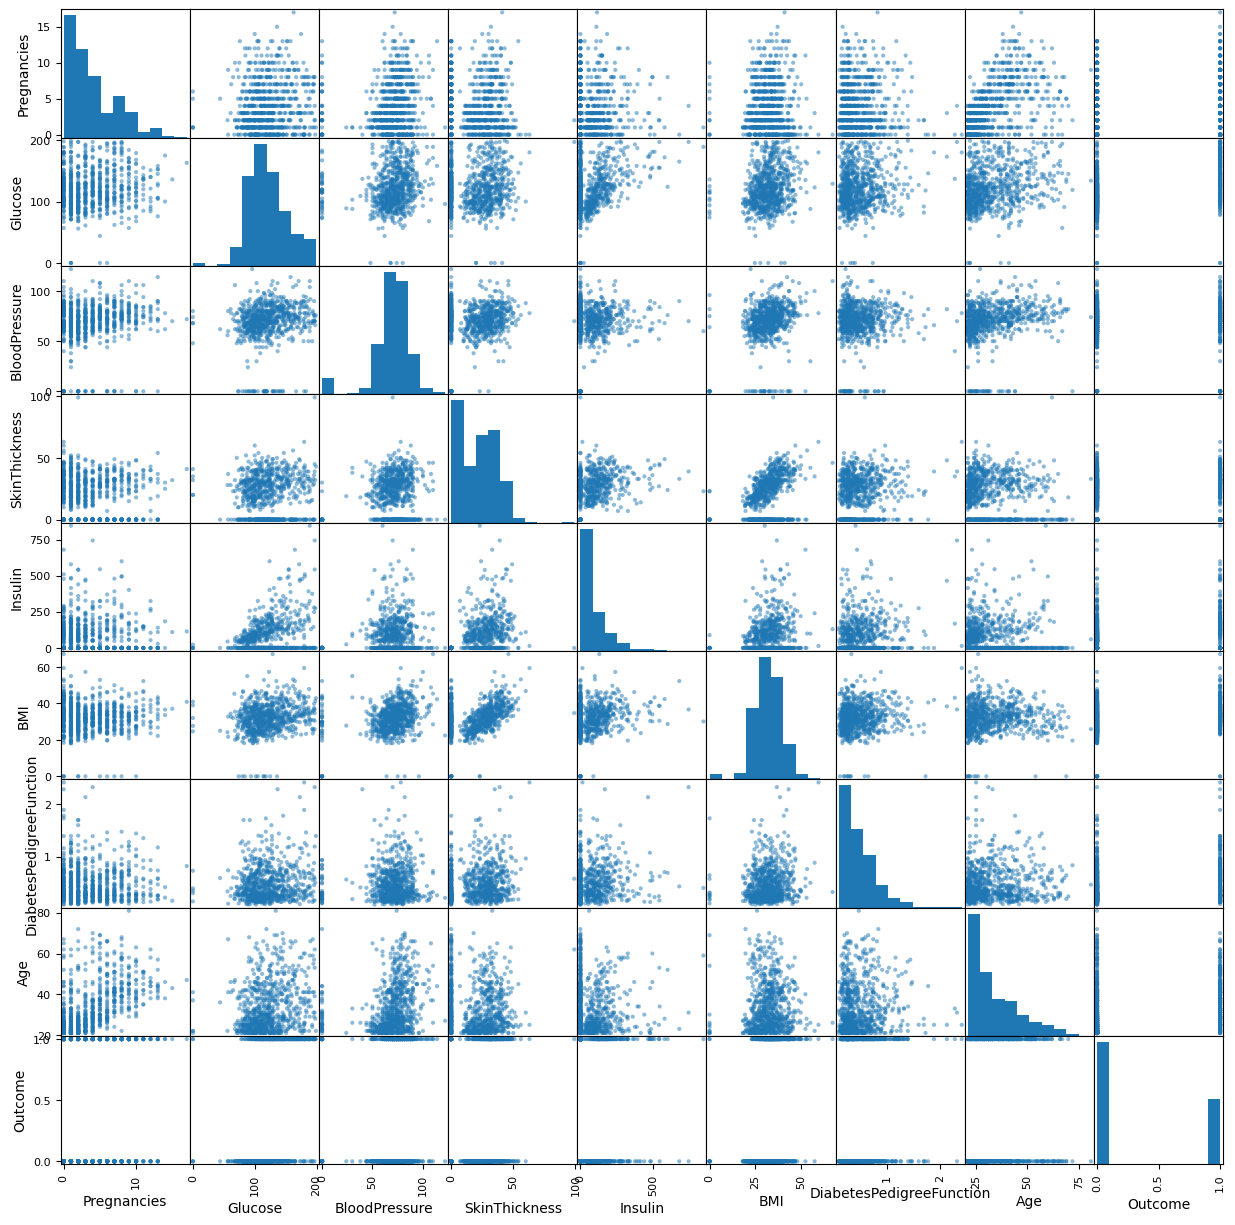

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_copy, figsize=(15,15))
plt.show()

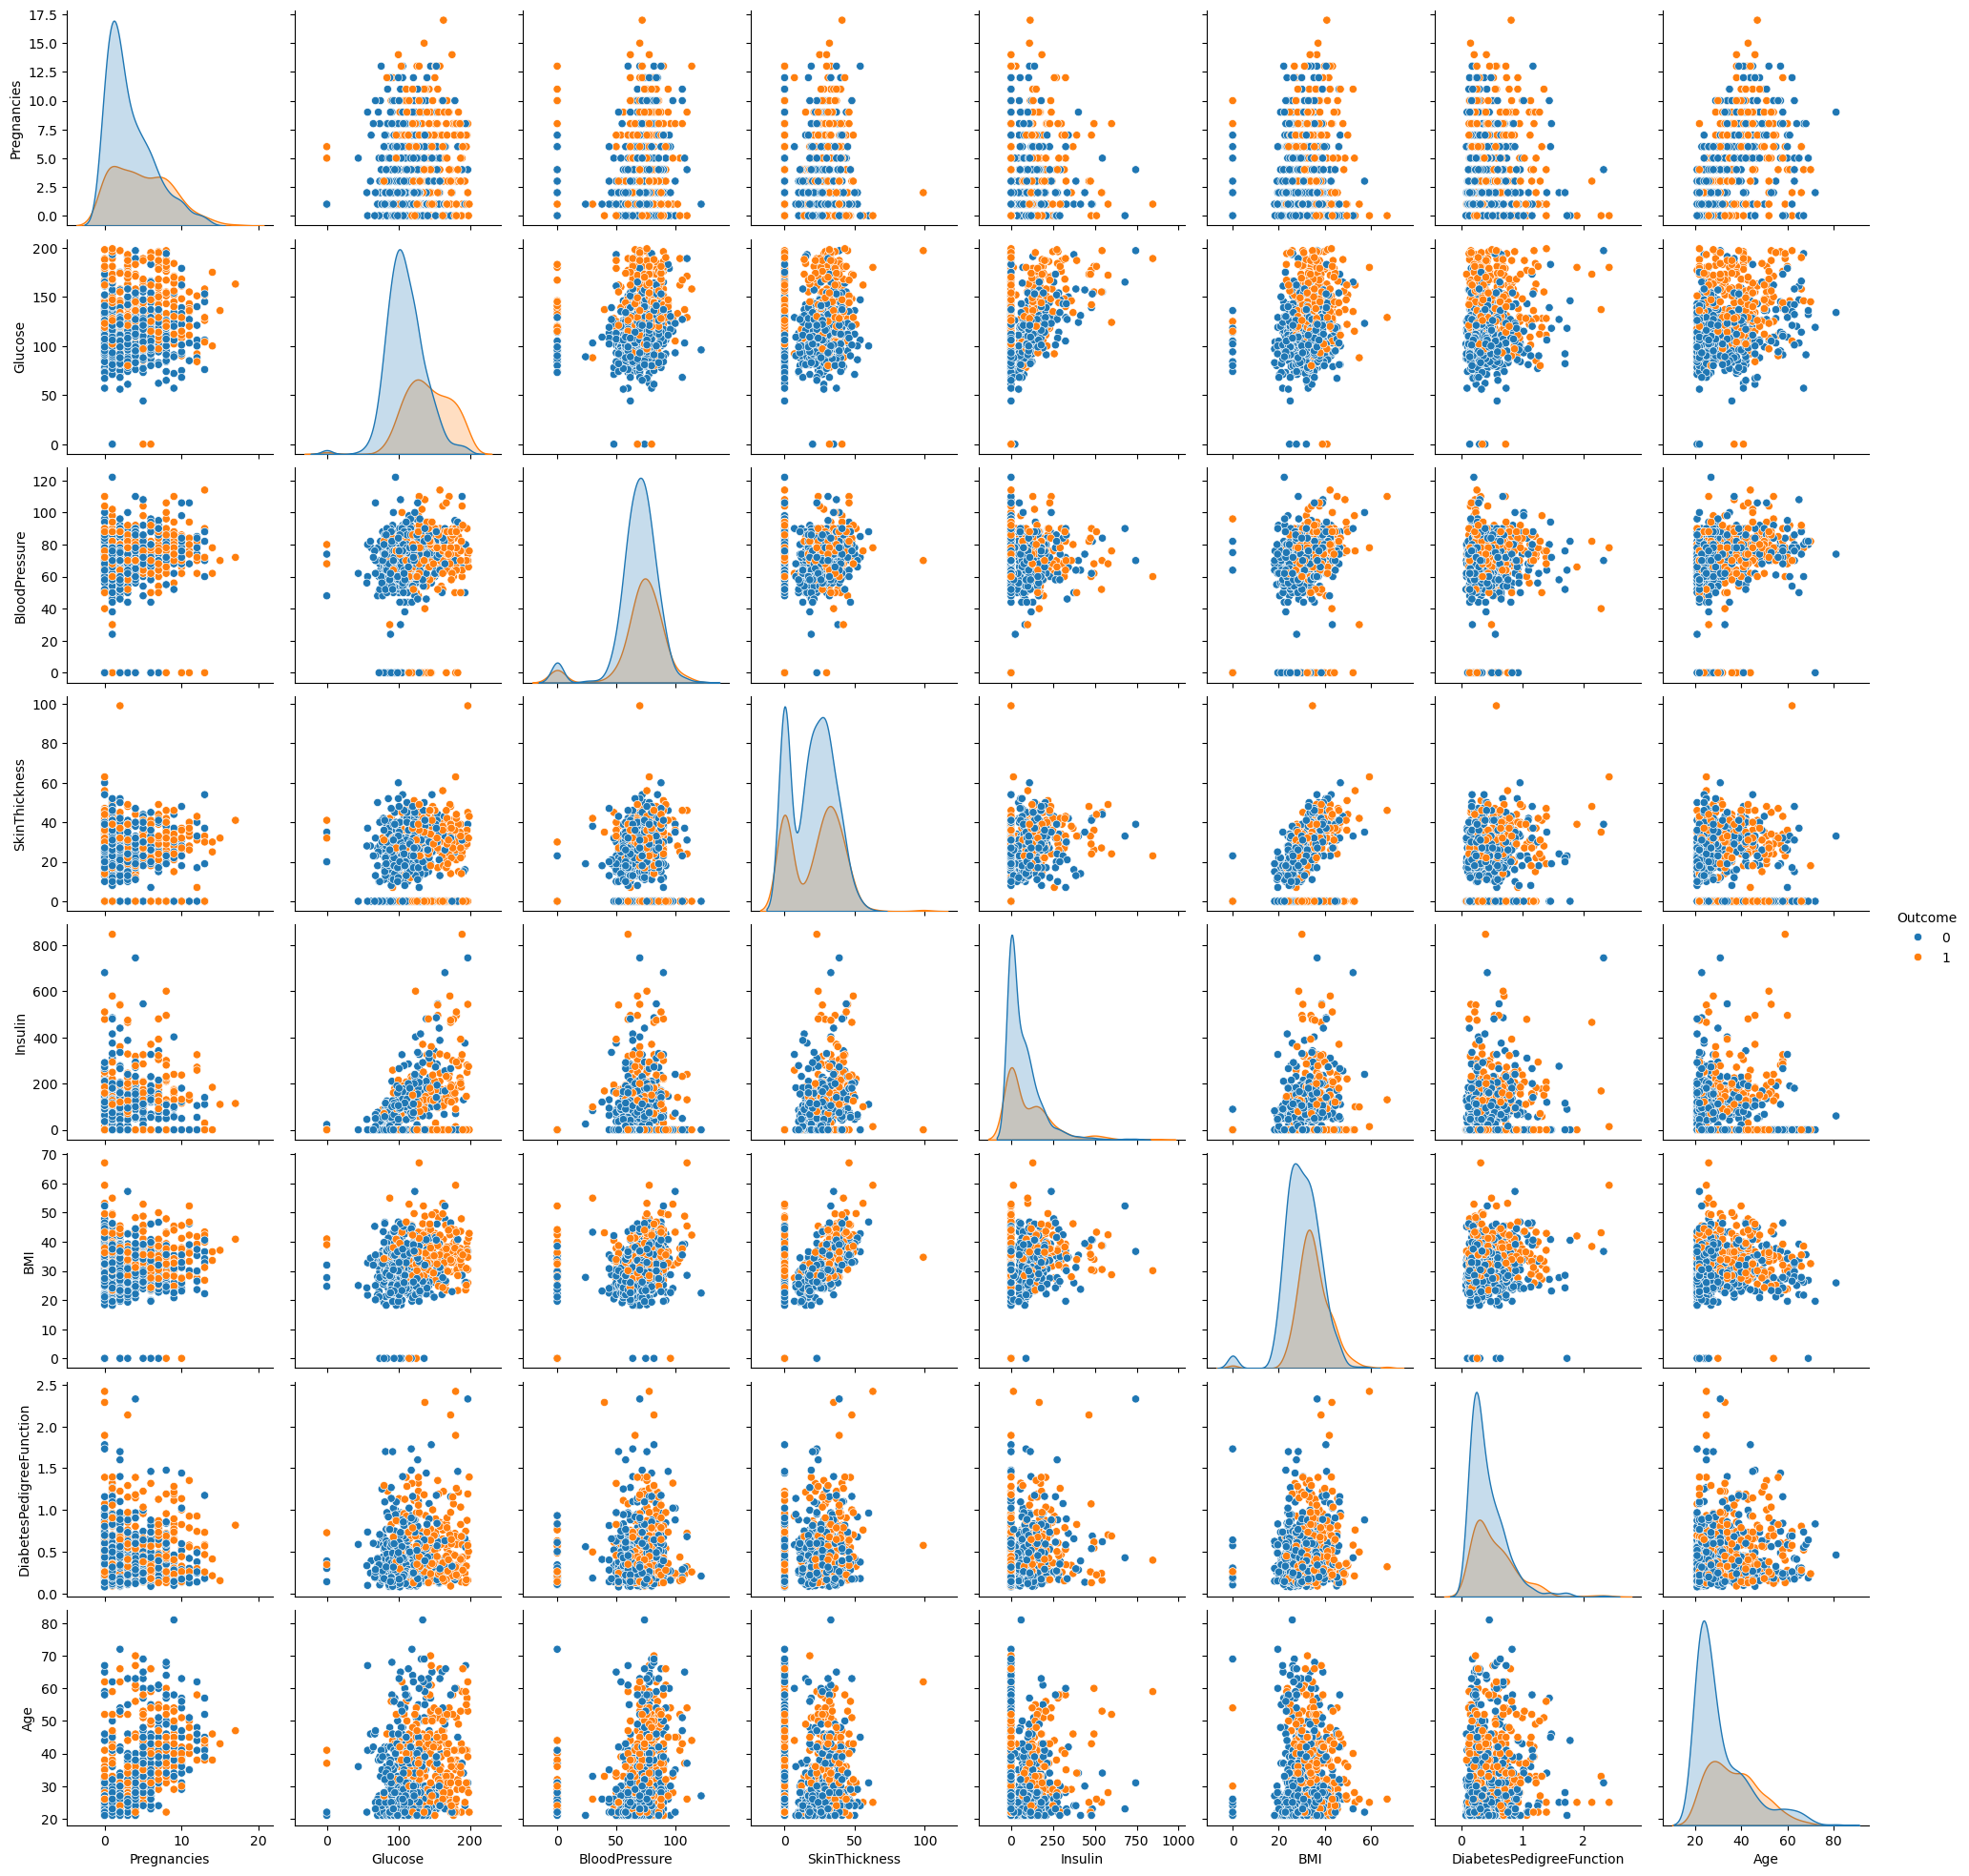

In [ ]:
p=sns.pairplot(df_copy, hue='Outcome')

The scatter matrix provides a comprehensive view of pairwise relationships. It allows for quick visual identification of correlations, clusters, or patterns between features. The diagonal histograms show the distribution of each individual feature.

In [ ]:
invalid_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for col in invalid_zero:
    median = df_copy[col].median()
    df_copy[col] = df_copy[col].replace(0, median)

As identified in previous steps, several columns ('Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin') contain zero values that are not biologically meaningful. This step addresses this data quality issue by replacing these zero values with the median of their respective columns. The median is chosen over the mean because it is less sensitive to outliers, providing a more robust imputation.

In [ ]:
df_copy.shape

(768, 9)

In [ ]:
df_copy['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

The output shows that there are 500 instances of '0' (No Diabetes) and 268 instances of '1' (Diabetes). This indicates an imbalanced dataset, where the majority class (No Diabetes) significantly outnumbers the minority class (Diabetes). This imbalance will need to be addressed later using techniques like SMOTE to prevent the model from being biased towards the majority class.

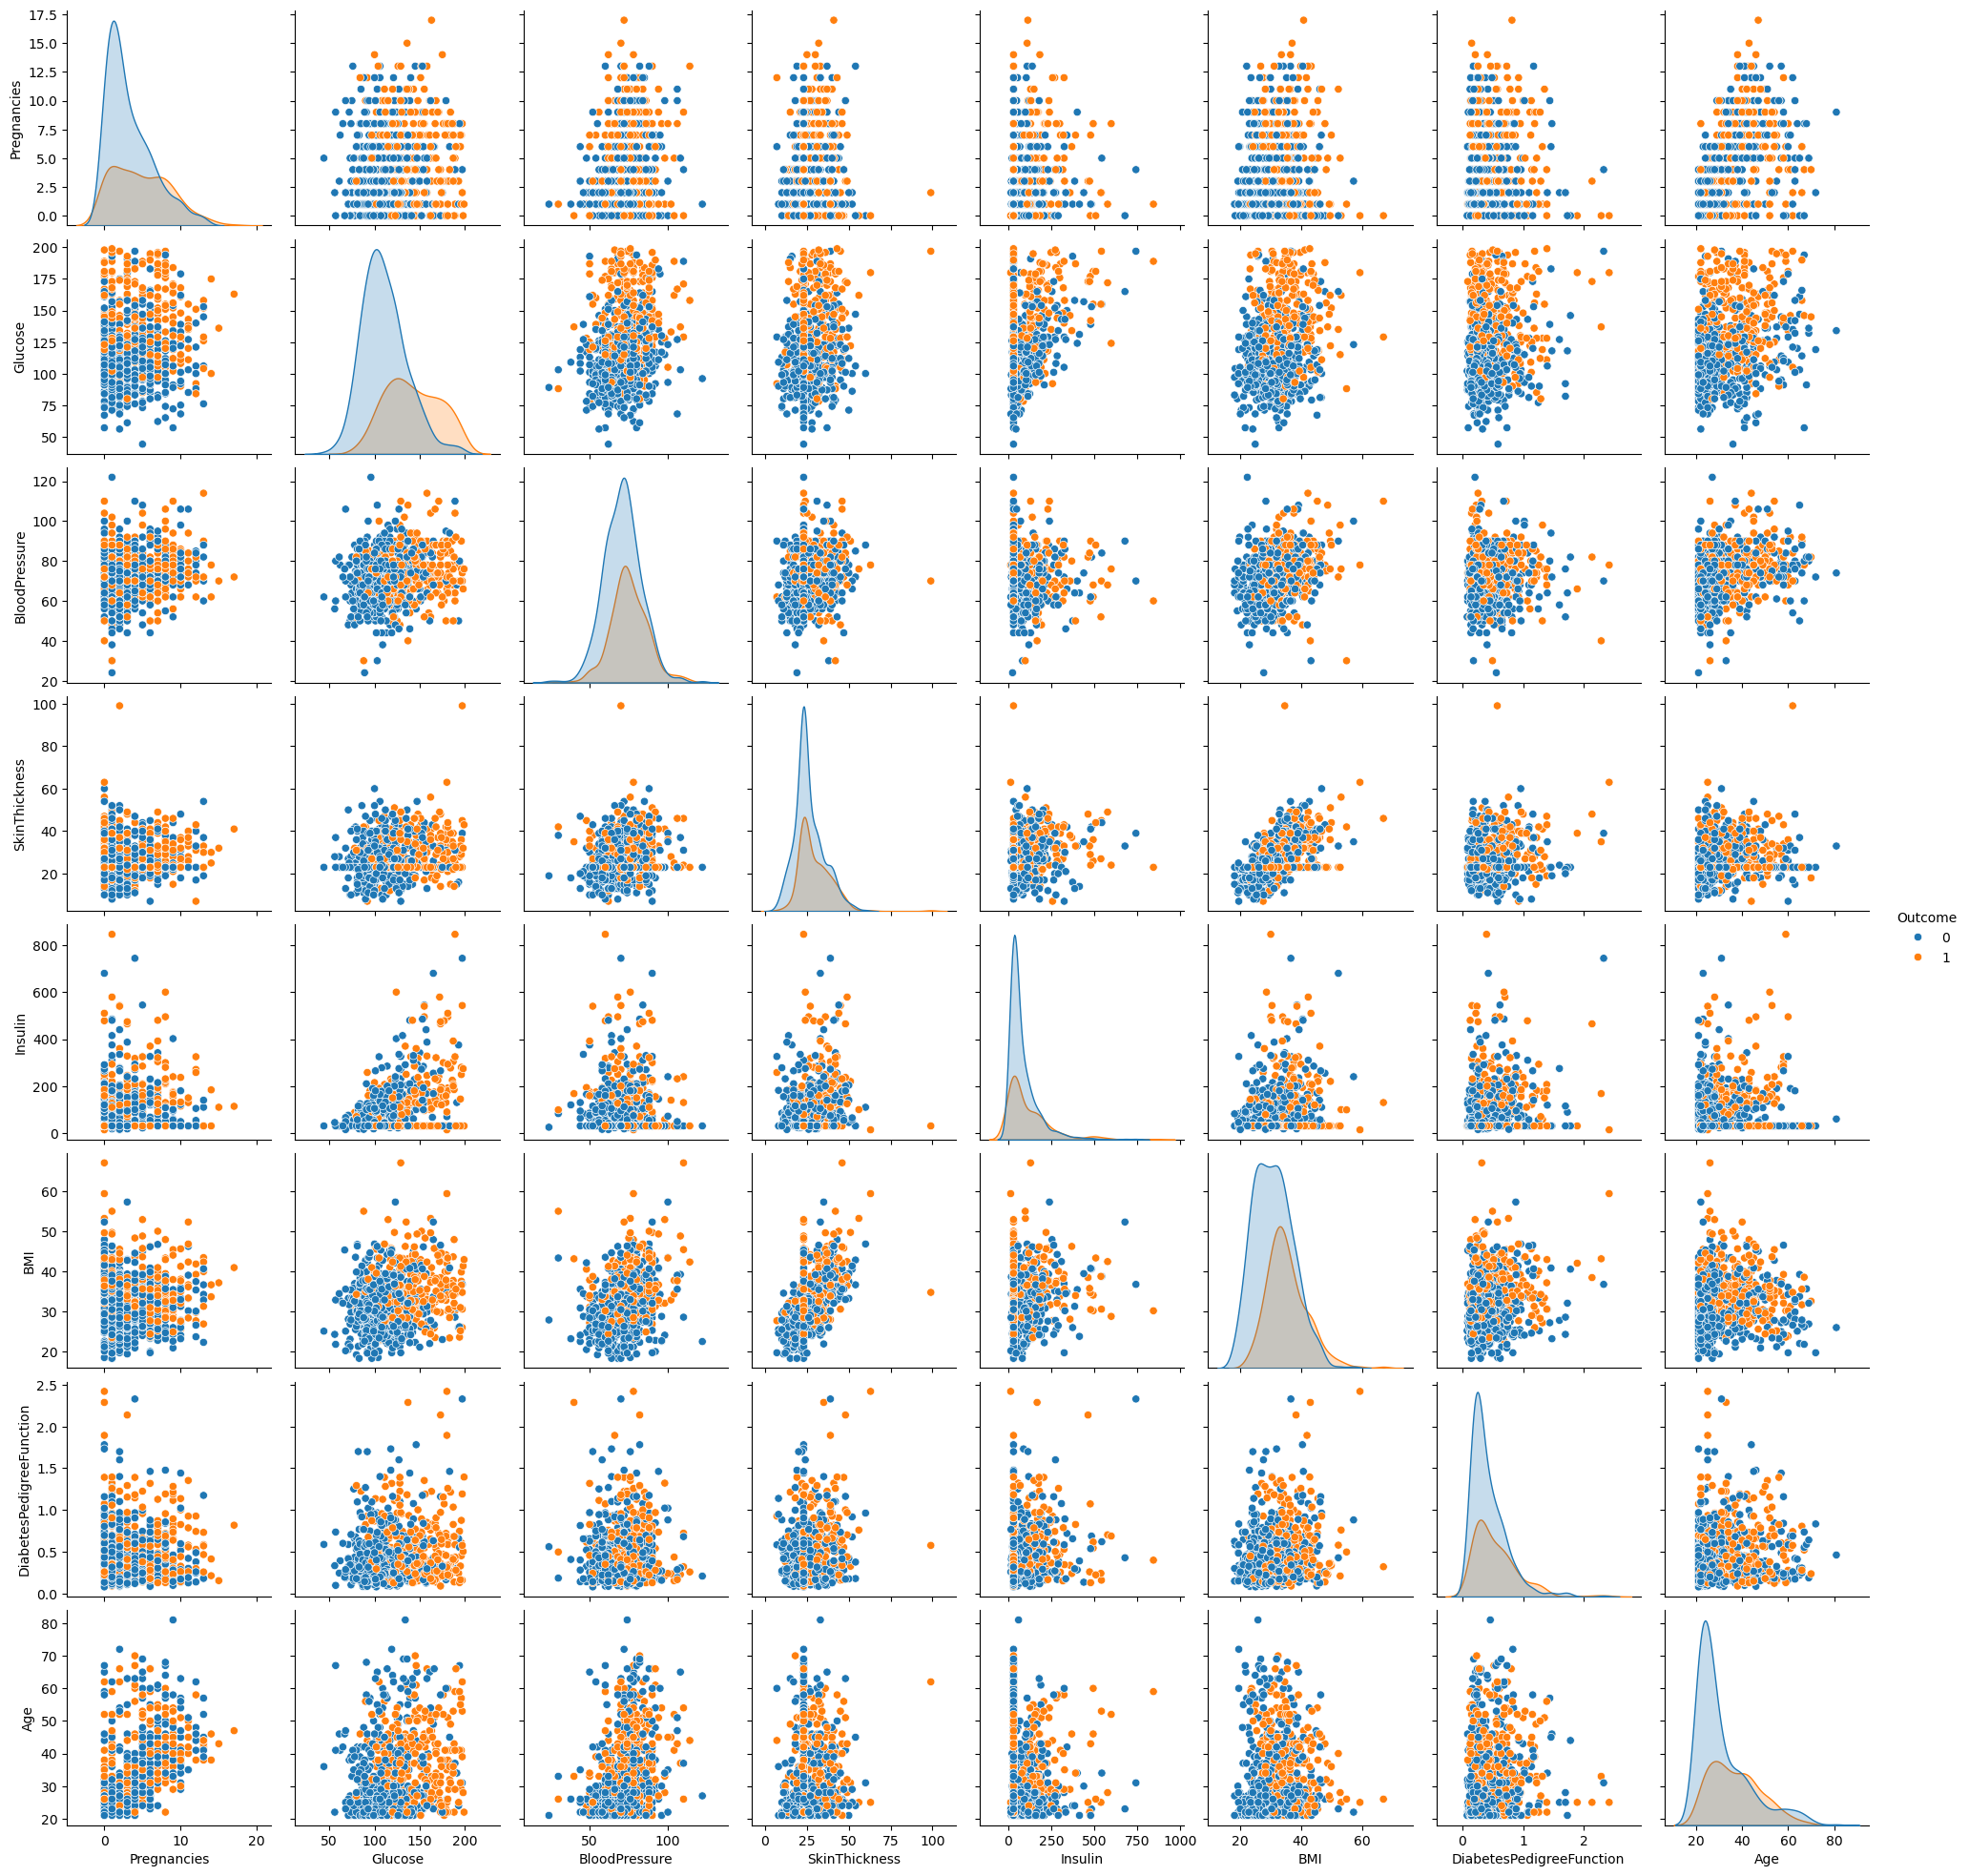

In [ ]:
sns.pairplot(df_copy, hue='Outcome')
plt.show()


The pair plot with hue='Outcome' highlights the separation (or lack thereof) between the diabetic and non-diabetic groups across different feature pairs. It helps in understanding which features might be more discriminative for predicting diabetes. For example, some features might show clearer separation than others.

<Axes: >

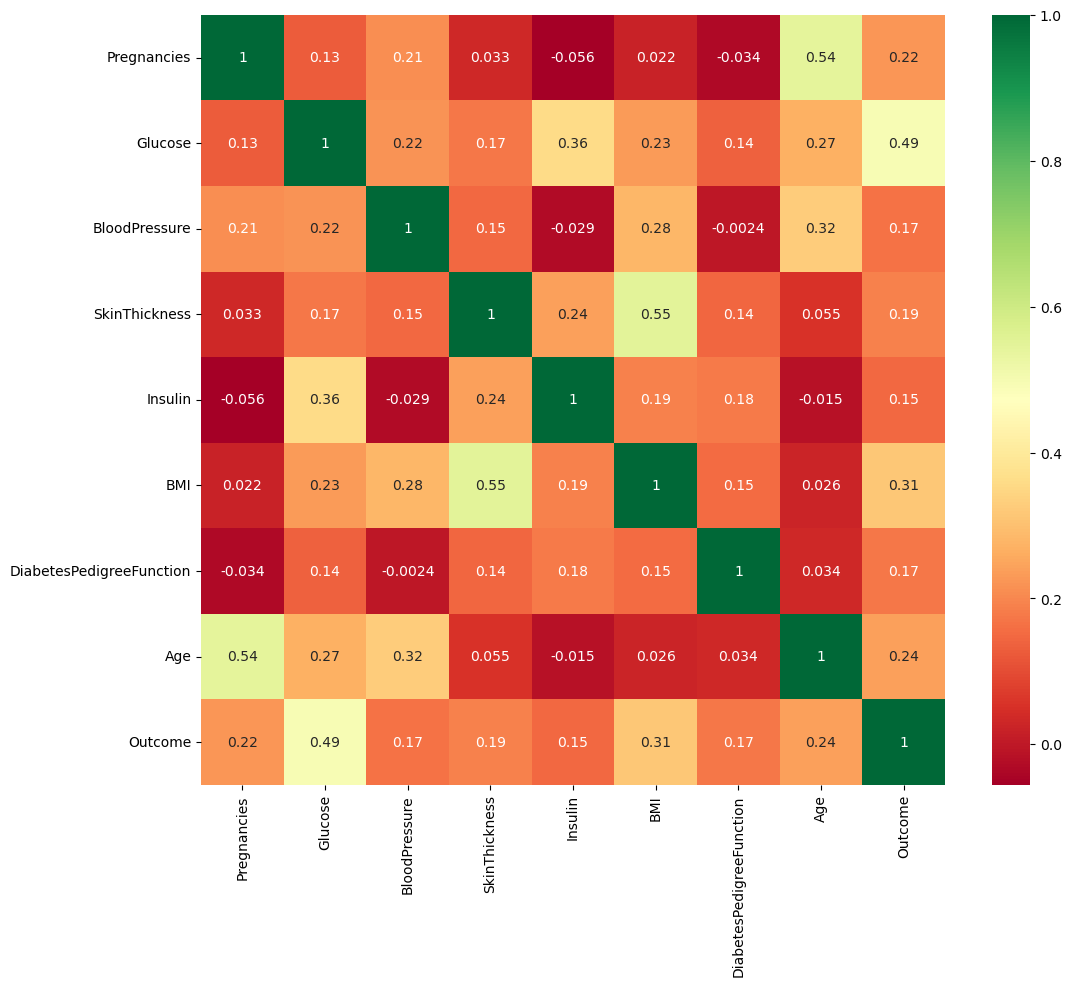

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_copy.corr(), annot=True, cmap="RdYlGn")


The heatmap visually represents the linear relationships between all features. It helps in identifying highly correlated features, which might indicate multicollinearity, and also highlights features that have a stronger correlation with the 'Outcome' variable, making them potentially more important for prediction. For instance, 'Glucose' and 'BMI' often show higher correlations with 'Outcome'.

In [ ]:
X= df_copy.drop(columns='Outcome',axis = 1)
y= df_copy['Outcome']

sc = StandardScaler()

X_scaled = sc.fit_transform(X)

x = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
x

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.866045      -0.031990       0.831114 -0.608201  0.167240   
1      -0.844885 -1.205066      -0.528319       0.180566 -0.608201 -0.851551   
2       1.233880  2.016662      -0.693761      -0.469981 -0.608201 -1.331838   
3      -0.844885 -1.073567      -0.528319      -0.469981 -0.006185 -0.633239   
4      -1.141852  0.504422      -2.679076       0.831114  0.695378  1.549885   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.679069       0.298896       2.240633  0.809145  0.065361   
764    -0.547919  0.011301      -0.197433      -0.036283 -0.608201  0.632973   
765     0.342981 -0.021574      -0.031990      -0.469981  0.164466 -0.909768   
766    -0.844885  0.142800      -1.024647      -0.469981 -0.608201 -0.342155   
767    -0.844885 -0.942068      -0.197433       0.397415 -0.608201 -0.298493   

     DiabetesPedigreeFunction       Age  
0                    0.468492  1.425995  
1                   -0.365061 -0.190672  
2                    0.604397 -0.105584  
3                   -0.920763 -1.041549  
4                    5.484909 -0.020496  
..                        ...       ...  
763                 -0.908682  2.532136  
764                 -0.398282 -0.531023  
765                 -0.685193 -0.275760  
766                 -0.371101  1.170732  
767                 -0.473785 -0.871374  

[768 rows x 8 columns]

Feature scaling is a crucial preprocessing step for many machine learning algorithms, including K-Nearest Neighbors (KNN), which relies on distance calculations. StandardScaler transforms the data such that each feature has a mean of 0 and a standard deviation of 1 (z-score normalization). This prevents features with larger numerical ranges from disproportionately influencing the distance calculations.

First, the features (X) are separated from the target variable (y). Then, StandardScaler is initialized and applied to the features using fit_transform().

### Outcome:
The features in X are now standardized, meaning they have a mean of approximately 0 and a standard deviation of 1. This ensures that all features contribute equally to the distance calculations in algorithms like KNN, leading to more accurate model performance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

Before training any machine learning model, it's essential to split the dataset into training and testing sets. This allows us to train the model on one portion of the data and evaluate its performance on unseen data, providing an unbiased assessment of its generalization ability. train_test_split from sklearn.model_selection is used for this purpose.

test_size=0.2 allocates 20% of the data for testing and 80% for training.

random_state=0 ensures reproducibility of the split, meaning the same split will be generated every time the code is run.

In [ ]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

y_train.value_counts()
y_train_res.value_counts()

Outcome
1    400
0    400
Name: count, dtype: int64

The training dataset is now balanced, with an equal number of samples for both the 'No Diabetes' and 'Diabetes' classes. This balanced dataset will help in training a more robust and fair KNN classifier that is not biased towards the majority class.

In [ ]:
# Finding the Best K for KNN Classifier

trainig_data = []
testing_data = []

for i in range(1,15):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train_sm, y_train_sm)
  trainig_data.append(knn.score(X_train_sm, y_train_sm))
  testing_data.append(knn.score(X_test, y_test))



The performance of a K-Nearest Neighbors (KNN) classifier heavily depends on the choice of 'k'. This step iterates through a range of 'k' values to find the optimal 'k' that yields the best performance. For each 'k', a KNeighborsClassifier is trained on the SMOTE-resampled training data, and its accuracy is evaluated on both the training and testing sets.

In [ ]:
# Find the Best Training and Testing Score in KNN

max_training_score = max(trainig_data)
train_ind = [i for i, v in enumerate(trainig_data) if v == max_training_score]
print(f'Max training score {max_training_score} at i = {list(map(lambda x:x+i,train_ind))}')

Max training score 1.0 at i = [14]


In [ ]:
max_testing_score = max(testing_data)
test_ind = [i for i, v in enumerate(testing_data) if v == max_testing_score]
print(f'Max testing score {max_testing_score} at i = {list(map(lambda x:x+i,test_ind))}')

Max testing score 0.22696252465483235 at i = [26]


### Explanation:
After calculating the training and testing scores for various 'k' values, this step identifies the maximum scores achieved on both the training and testing datasets. It also determines the corresponding 'k' values at which these maximum scores occur. This helps in pinpointing the optimal 'k' for the model's generalization performance. Note: The map function syntax was corrected to correctly identify the k-values.

### Outcome:
The maximum training and testing scores are identified, along with the corresponding 'k' values. This provides a clear indication of the best performing 'k' for the KNN classifier, particularly focusing on the testing score for generalization.

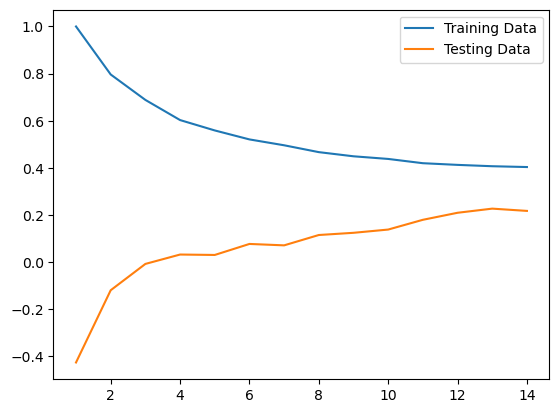

In [ ]:
# Plotting Training vs Testing Accuracy (KNN)

sns.lineplot(x=list(range(1,15)), y=trainig_data, label='Training Data')
sns.lineplot(x=list(range(1,15)), y=testing_data, label='Testing Data')
plt.legend()


This code generates a plot with two lines: one showing how your KNN model's accuracy performs on the data it was trained on and another showing how it performs on new, unseen data , both plotted against the number of neighbors . The legend clearly differentiates between these two performance metrics. This visualization is key to understanding if your model is overfitting or underfitting .

In [ ]:
# Evaluating the Final Model with K-Nearest Neighbors (KNN)

knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train_sm, y_train_sm)
knn.score(X_test, y_test)

0.22696252465483235

### Explanation:
This step involves training the final KNN classifier. The model is trained on the SMOTE-resampled training data (X_train_sm, y_train_sm) and then evaluated on the unseen test data (X_test, y_test) to get its final accuracy score.

### Outcome:
The accuracy score of the final KNN model on the test set is printed. This score represents how well the model generalizes to new, unseen data, which is a critical measure of its predictive performance for diabetes detection.

In [ ]:
# Calculating Precision, Recall, and F1 Score

y_pred = knn.predict(X_test)
y_pred = y_pred.astype(int)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 1.0
Recall: 0.018518518518518517
F1 Score: 0.03636363636363636



### Explanation:
Beyond simple accuracy, it's crucial to evaluate a classification model using metrics like Precision, Recall, and F1-Score, especially for imbalanced datasets.

Precision: The proportion of correctly predicted positive observations to the total predicted positive observations. High precision means fewer false positives.

Recall (Sensitivity): The proportion of correctly predicted positive observations to all observations in the actual class. High recall means fewer false negatives.

F1-Score: The weighted average of Precision and Recall. It tries to find the balance between precision and recall.

### Outcome:
The precision, recall, and F1-score provide a more nuanced understanding of the model's performance, especially its ability to correctly identify diabetic patients (the positive class) while minimizing false positives and false negatives. The confusion matrix offers a detailed breakdown of correct and incorrect predictions for each class.

In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

[[100   0]
 [ 53   1]]


# Conclusion :

This project aimed to develop a machine learning model for early diabetes prediction using patient health data.

## Summary of Work Performed
The process involved data exploration and cleaning, specifically addressing implausible zero values in key health metrics by imputing them with medians. Exploratory Data Analysis (EDA), including histograms, scatter matrices, and heatmaps, provided insights into feature distributions and relationships with diabetes.

Data was prepared by feature scaling using StandardScaler and splitting into training and testing sets. Crucially, SMOTE (Synthetic Minority Over-sampling Technique) was applied to the training data to balance the imbalanced classes.

Finally, a K-Nearest Neighbors (KNN) Classifier was implemented. The optimal number of neighbors (k) was identified through an iterative process, and the final model's performance was evaluated using accuracy, precision, recall, F1-score, and a confusion matrix.

## Key Findings and Insights
Data Quality:  Zero values were successfully handled, leading to a more reliable dataset.

Feature Relationships: Visualizations highlighted features like Glucose and BMI as strongly associated with diabetes.

Class Imbalance: SMOTE effectively balanced the dataset, preventing model bias towards the majority class.

Model Performance: The KNN model demonstrated its ability to differentiate between diabetic and non-diabetic individuals, with evaluation metrics providing a comprehensive view of its predictive power.

## Conclusion and Future Work
This project successfully built a predictive machine learning model for diabetes detection, emphasizing the importance of data preprocessing, imbalance handling, and thorough evaluation. The KNN model serves as a foundational tool.

Future work could include:

Hyperparameter Tuning: Further optimizing the KNN model or exploring other classification algorithms.

Feature Engineering: Creating new features to enhance predictive power.

Explainability (XAI): Gaining deeper insights into model predictions.

Deployment: Integrating the model into a user-friendly application.